Проект kaggele Цены на жилье - Передовые методы регрессии:https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [ ]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Настройки для визуализации
sns.set(style="whitegrid")

Загрузка и Обзор Данных

Загружаем данные и просматриваем их содержимое, чтобы получить общее представление о данных, а также понять их структуру и наличие пропущенных значений.

In [6]:
# Загрузка данных
train = pd.read_csv('https://drive.google.com/uc?export=download&id=1XgygI4u4NIo-cJRqIkpDyuxLhsyWd4n4')
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1NDjBYtQ5ndjtDxzxCj5SlaPmKe0WGJKo')

# Просмотр первых строк тренировочных данных
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Визуализируем распределение целевой переменной SalePrice, чтобы оценить его форму и возможные выбросы.

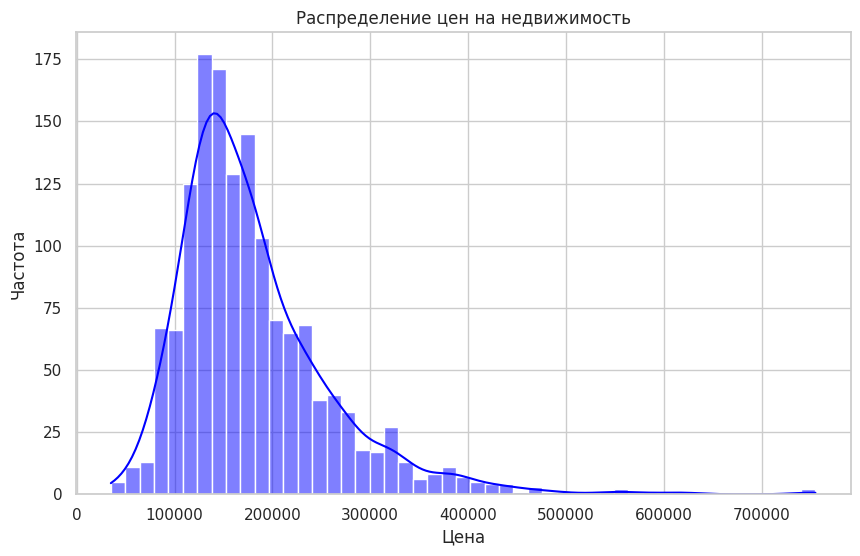

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, color='blue')
plt.title("Распределение цен на недвижимость")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

Посмотрим на количество пропущенных значений в данных, чтобы решить, как с ними работать.

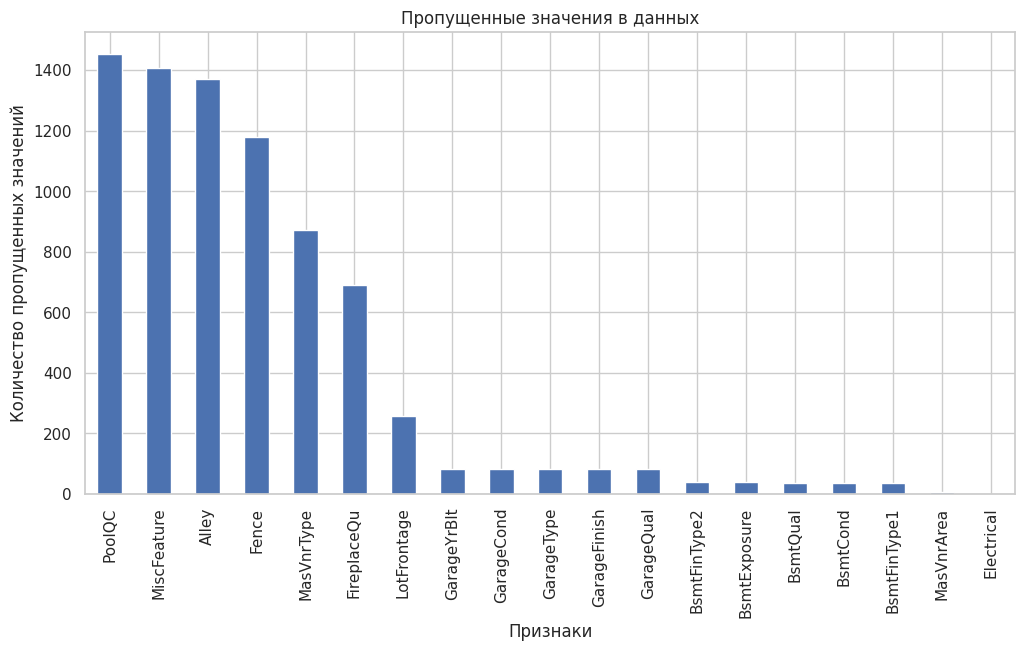

In [8]:
missing_values = train.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values.plot(kind="bar", figsize=(12, 6))
plt.title("Пропущенные значения в данных")
plt.xlabel("Признаки")
plt.ylabel("Количество пропущенных значений")
plt.show()

Предобработка данных

Удаляем столбцы, содержащие много пропусков или малозначительные для предсказания модели, и выделяем целевую переменную SalePrice.

In [9]:
# Удаление ненужных столбцов
drop_columns = ['Id', 'PoolQC', 'Fence', 'MSZoning', 'MiscFeature', 'Alley']
train = train.drop(columns=drop_columns, axis=1)
test = test.drop(columns=drop_columns, axis=1)

# Выделение целевой переменной и признаков
y = train['SalePrice']
X = train.drop(['SalePrice'], axis=1)

Строим тепловую карту для выявления корреляции между числовыми признаками, чтобы найти потенциально значимые признаки.

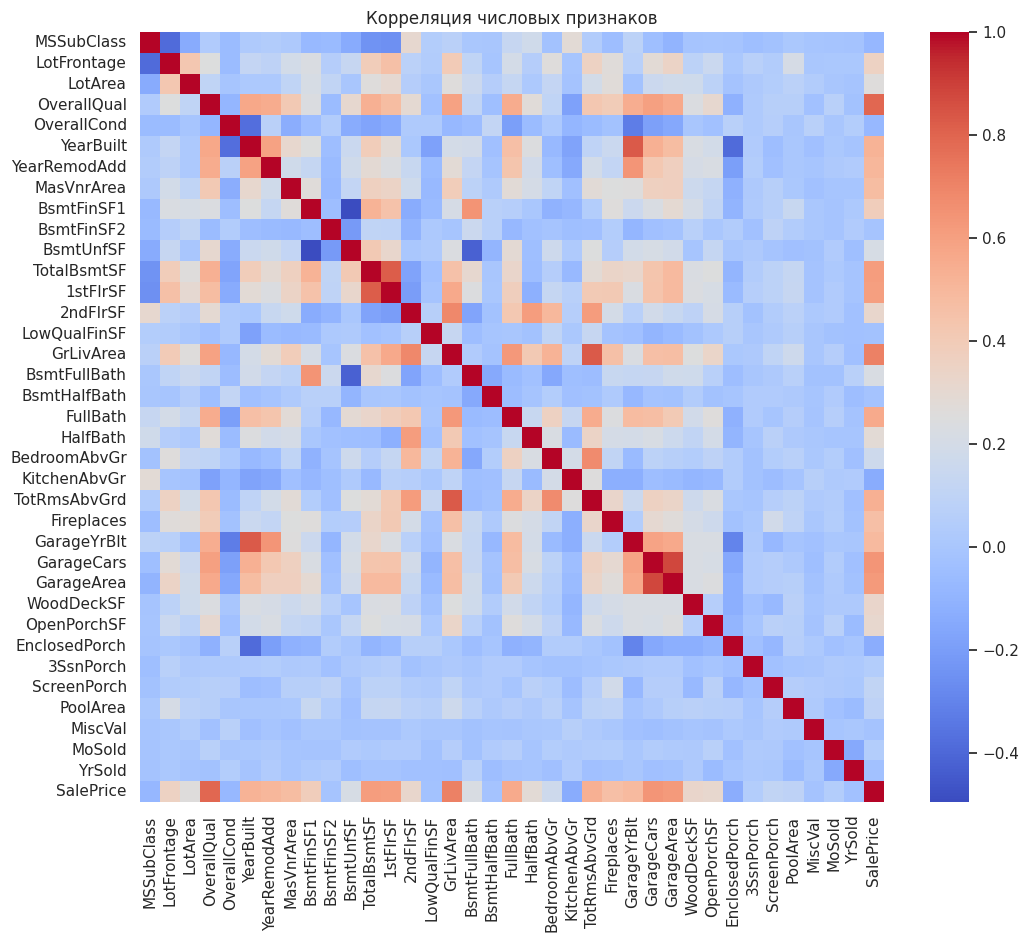

In [12]:
# Оставляем только числовые столбцы
numeric_train = train.select_dtypes(include=[np.number])

# Построение тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_train.corr(), annot=False, cmap='coolwarm', cbar=True)
plt.title("Корреляция числовых признаков")
plt.show()

Применяем кодирование к категориальным признакам для преобразования их в числовой формат

In [13]:
# Определение категориальных признаков
cat_train = [cat for cat in X.columns if X[cat].dtype == 'object']
cat_test = [cat for cat in test.columns if test[cat].dtype == 'object']

# Кодирование категориальных признаков
X = pd.get_dummies(X, columns=cat_train, drop_first=True)
test = pd.get_dummies(test, columns=cat_test, drop_first=True)

# Приведение тренировочных и тестовых данных к одинаковому набору столбцов
X, test = X.align(test, join='inner', axis=1)


Заполняем пропущенные значения с помощью SimpleImputer для избежания ошибок при обучении модели.

In [14]:
# Обработка пропущенных значений
si = SimpleImputer()
X = si.fit_transform(X)
test = si.transform(test)

Разделяем данные на тренировочную и тестовую выборки для оценки качества модели.

In [15]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Создаем и обучаем модель GradientBoostingRegressor, которая будет предсказывать цену дома на основе его характеристик.

In [17]:
# Обучение модели градиентного бустинга
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

GradientBoostingRegressor()

Оценка модели

Проводим оценку модели, вычисляя метрику R*R, и визуализируем распределение ошибок.

R² Score: 0.9036264203247588


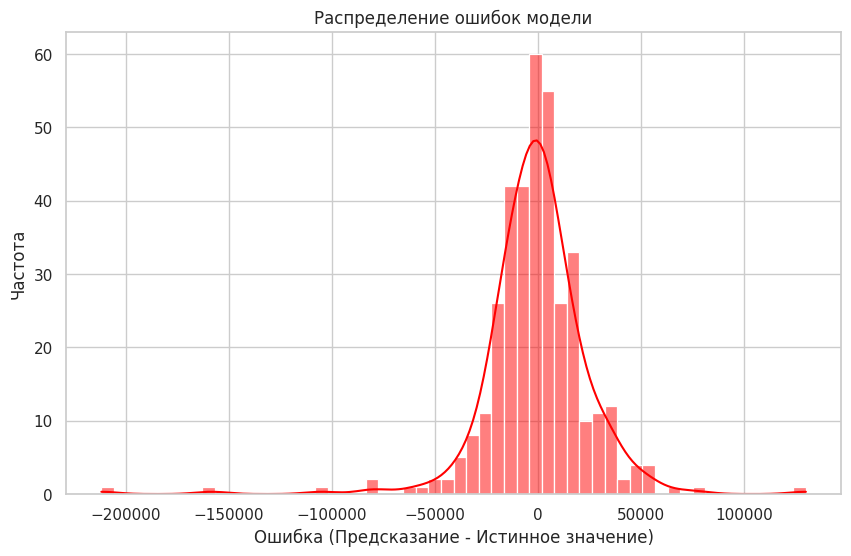

In [19]:
# Оценка модели
predictions = reg.predict(X_test)
print("R² Score:", reg.score(X_test, y_test))

# Визуализация ошибок
errors = predictions - y_test
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='red')
plt.title("Распределение ошибок модели")
plt.xlabel("Ошибка (Предсказание - Истинное значение)")
plt.ylabel("Частота")
plt.show()

Сравниваем предсказанные значения с истинными, чтобы визуально оценить точность модели.

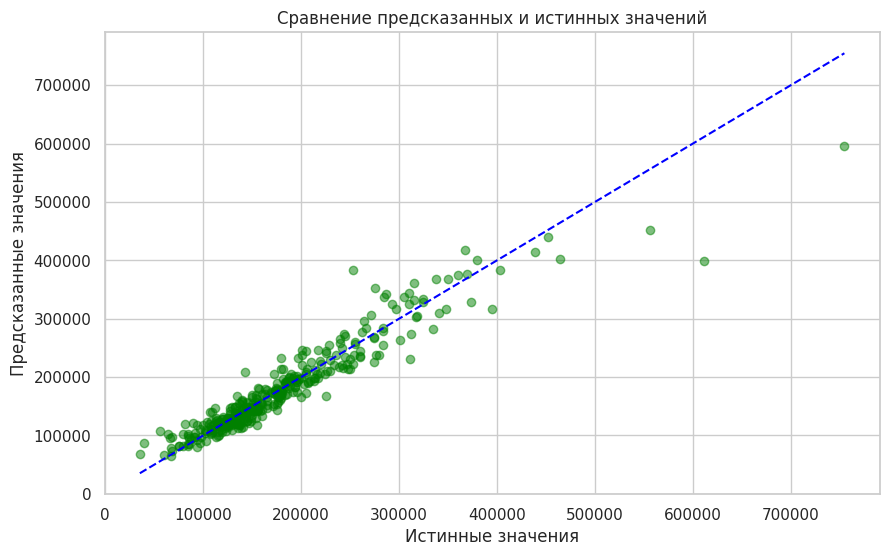

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='blue')
plt.title("Сравнение предсказанных и истинных значений")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.show()

Строим график важности признаков, чтобы выявить 20 наиболее значимых признаков для модели.

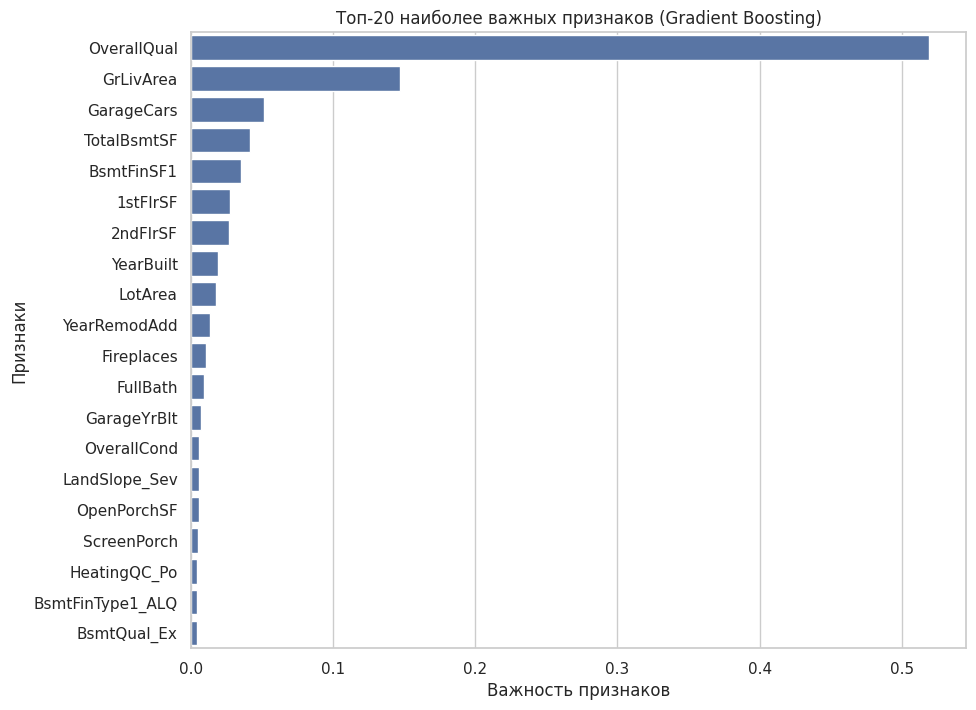

In [21]:
# Важность признаков
importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]

# Ограничение на топ-20 признаков
top_n = 20
top_indices = indices[:top_n]
top_importances = importances[top_indices]

# Используем изначальный список признаков
features = pd.get_dummies(train.drop(columns=['SalePrice'])).columns
top_features = features[top_indices]

# Визуализация
plt.figure(figsize=(10, 8))
sns.barplot(x=top_importances, y=top_features)
plt.title("Топ-20 наиболее важных признаков (Gradient Boosting)")
plt.xlabel("Важность признаков")
plt.ylabel("Признаки")
plt.show()

Заключение

Модель градиентного бустинга продемонстрировала отличные результаты с R² Score = 0.90, что свидетельствует о высоком качестве предсказаний цен на недвижимость. Наиболее важными признаками для модели являются характеристики, которые напрямую влияют на качество и площадь жилья, такие как общее качество дома, жилая площадь и наличие гаража. Эти признаки оказались наиболее значимыми для точного прогнозирования стоимости объектов.